In [1]:
import numpy as np
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense,Flatten,Activation
from keras.utils import np_utils
import matplotlib.pyplot as plt



/Users/phx/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [25]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
X_test.shape

(10000, 28, 28)

In [28]:
model = Sequential()
model.add(Dense( units=100,input_dim=28*28,kernel_initializer="normal",activation="relu" ))
model.add(Dense( units=10,kernel_initializer="normal",activation="softmax" ) )
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])


In [29]:
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

X_train_flat = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test_flat = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [30]:
X_train_norm = X_train_flat/255
X_test_norm = X_test_flat/255

In [31]:
model.fit(X_train_norm,y_train_onehot,epochs=10, batch_size=800)

Epoch 1/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.9766 - acc: 0.7814
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.3460 - acc: 0.9051
Epoch 3/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.2745 - acc: 0.9230
Epoch 4/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.2336 - acc: 0.9349
Epoch 5/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2057 - acc: 0.9433
Epoch 6/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.1831 - acc: 0.9486
Epoch 7/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.1664 - acc: 0.9531
Epoch 8/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.1514 - acc: 0.9574
Epoch 9/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.1391 - acc: 0.9610
Epoch 10/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.1281 - acc: 0.9638

In [33]:
scores = model.evaluate(X_test_norm, y_test_onehot)

10000/10000 [==============================] - 0s 44us/step


In [34]:
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

	[Info] Accuracy of testing data = 96.2%


In [37]:
X = X_test_norm[0:10,:]
predictions = model.predict_classes(X)
# get prediction result
print(predictions)

[7 2 1 0 4 1 4 9 6 9]


In [39]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

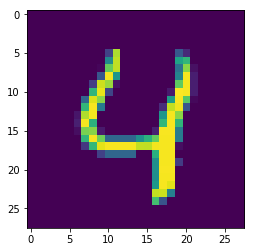

In [43]:
plt.imshow(X_test[4])
plt.show() 

In [5]:
np.percentile([2,1,4,3],50)

2.5